In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import numpy as np

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Reading of the CSV FILE


In [8]:
df=pd.read_csv('car data.csv')

Understanding the data


In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.shape

(301, 9)

Checking for null values

In [15]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Trying to understand the categories of the data 

In [17]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [18]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [19]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

## Encoding of data that will be needed for the Model training 

In [54]:
df1=pd.read_csv('Car data.csv')

In [56]:
df1['Fuel_Type'] = df1['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df1['Transmission'] = df1['Transmission'].replace({'Automatic': 0, 'Manual': 1})
df1['Seller_Type'] = df1['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})


In [57]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


### Splitting the data in train and test and dropping the unwanted coloumn 

In [59]:
X=df1.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']

In [60]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,0,0,1,0
3,2011,4.15,5200,0,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,0,0,1,0
298,2009,11.00,87934,0,0,1,0
299,2017,12.50,9000,1,0,1,0


In [61]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [64]:
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.1,random_state=2)

# Linear Regression

In [65]:
linearmodel=LinearRegression()

In [66]:
linearmodel.fit(X_train,Y_train)

LinearRegression()

In [68]:
PredictModel=linearmodel.predict(X_train)

In [74]:
error_score=metrics.r2_score(Y_train,PredictModel)
print('R-square error',error_score)

R-square error 0.9616016091605251


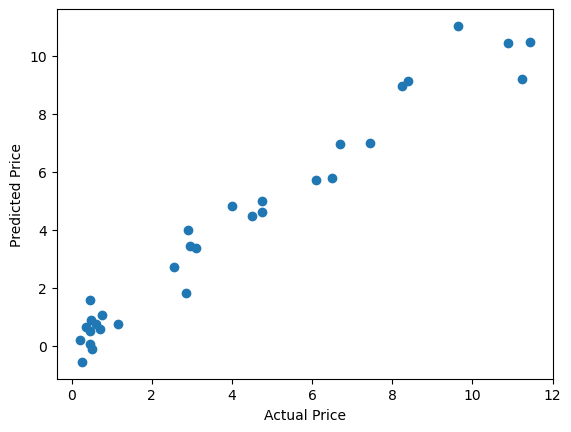

In [79]:
plt.scatter(Y_train,PredictModel)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [80]:
trainningPredict=linearmodel.predict(X_test)

In [82]:
error_score=metrics.r2_score(Y_test,trainningPredict)
print('R-square error',error_score)

R-square error 0.7539954361032903


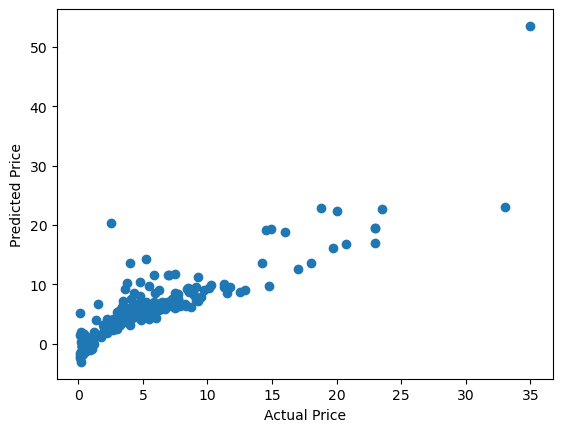

In [83]:
plt.scatter(Y_test,trainningPredict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()